<a href="https://colab.research.google.com/github/mdietterle/TrabalhosMachineLearningPos/blob/main/RESUMO_Dominant_Color_Extraction_for_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extrair cor dominante de uma imagem

O link para o arquivo original está disponível neste [link](https://github.com/dakshtrehan/Dominant-Color-Extraction).

O exercício apresentado não trabalha com uma base de dados em formato texto, mas sim com imagens. Acredito que seja uma forma visual de entender o que o algoritmo de clusterização se propõe a fazer.

A ideia aqui é classificar cada um dos pixels da imagem em uma categoria, e posteriormente apresentar a imagem transformada (com as cores da imagem classificadas em uma categoria).

Normalmente, uma imagem possui muitos pixels com cores semelhantes, que podem não ser percebidas como cores diferentes, auxiliando, claro, na visualização da mesma.

Porém, muitas vezes precisamos armazenar uma cópia da imagem com uma qualidade menor, para referência, ou até mesmo quando a qualidade total não é necessária.

O notebook abaixo usa K-Means para encontrar as cores predominantes de uma imagem para "compactar" a imagem, reduzindo o tamanho, porém possibilitando a sua visualização.

**Passo 1** 

Carregar as bibliotecas necessárias:


1.   numpy
2.   matplotlib
3.   cv2

A biblioteca cv2 é uma biblioteca de visão computacional, de código aberto, que é usada para diversos tipos de análise em imagens e vídeos, como  detecção, tracking e reconhecimento facial, edição de fotos e vídeos, detecção e análise de textos, etc.

Além disso, a biblioteca já vem com diversos modelos treinados, o que permite que facilmente sejam implementados programas de manipulação/tratamento de imagens.


In [54]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

**Passo 2**

Carregar a imagem a partir do disco. Neste caso, a imagem precisa estar previamente carregada no disco onde será executado o notebook.

Poderia ter sido implementada uma rotina de carregamento da imagem, porém como o notebook original não faz este tipo de processamento, optei por deixar como o original.

**Observação importante:** Utilizarei uma imagem diferente da presente no tutorial, e por isso precisarei alterar alguns parâmetros do notebook para adequar o mesmo à imagem em questão. 

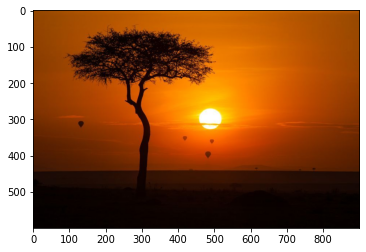

In [55]:
im=cv2.imread("porDoSol.jpg")
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)

**Passo 4**

Imprimir na tela algumas informações da imagem, como seu tamanho e quantidade de canais de cores.

In [56]:
original_pixels=im.shape
print(im.shape)

(600, 900, 3)


**Passo 4**

"Achatar" cada um dos canais da imagem para treinamento (fit) do modelo. O comando flatten cria um array de imagens com o tamanho indicado no comando.

In [57]:
#Flattening each channel of image
pixel = im.reshape((600*900,3))
print(pixel.shape)

(540000, 3)


**Passo 5**

importar a biblioteca KMeans.

In [58]:
from sklearn.cluster import KMeans

**Passo 6**

Definir o número de cores a extrair da imagem e treinar o modelo.

In [59]:
dominant_color= 5
km= KMeans(n_clusters= dominant_color)
km.fit(pixel)

KMeans(n_clusters=5)

**Passo 7**

Encontrar o centro de cada um dos grupos de cores encontrados.

In [60]:
centers = km.cluster_centers_
print(centers)

[[ 22.60011131   6.22142853   2.11169251]
 [173.09890474  72.14718952   1.94681197]
 [112.4141885   41.97369202   3.37195062]
 [232.92292864 119.88528337   2.17560447]
 [253.58424425 251.72521674 232.3309461 ]]


**Passo 8**

Transformar os centros encontrados em inteiros e imprimir os mesmos novamente

In [61]:
centers = np.array(centers, dtype='uint8')

In [62]:
print(centers)

[[ 22   6   2]
 [173  72   1]
 [112  41   3]
 [232 119   2]
 [253 251 232]]


**Passo 9**

Imprimir as cores encontradas nos centros dos grupos de cores, para visualização prévia.

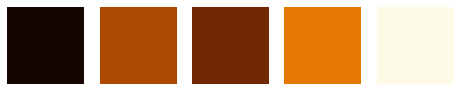

In [63]:
#Plotting these colors

i =1
plt.figure(0,figsize=(8,2))


color = []
for x in centers:
    plt.subplot(1,5,i)
    plt.axis("off")
    i+=1
    color.append(x)
    
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = x
    plt.imshow(a)
plt.show()

**Passo 10**

Criar um novo array, do tamanho da imagem, preenchido com zeros, para receber a nova imagem criada.

Após, imprimir o array das cores, com seus valores RGB.

In [64]:
#Segmenting the original image
new_pixel= np.zeros(((600*900),3),dtype='uint8')

In [65]:
color

[array([22,  6,  2], dtype=uint8),
 array([173,  72,   1], dtype=uint8),
 array([112,  41,   3], dtype=uint8),
 array([232, 119,   2], dtype=uint8),
 array([253, 251, 232], dtype=uint8)]

**Passo 11**

Imprimir os labels ao qual cada um dos pixels pertence.

In [66]:
km.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

**Passo 12**

Fazer um laço de repetição para o array criado no "Passo 10", e atribuir ao pixel da nova imagem a cor do pixel determinado no label (array apresentado no passo anterior).

Após isso, reformatar a imagem para seu tamanho original (original pixels, visto no "Passo 4").

In [67]:
for i in range(new_pixel.shape[0]):
    new_pixel[i]=color[km.labels_[i]]
new_pixel=new_pixel.reshape(original_pixels)

**Passo 13**

Apresentar a imagem original...

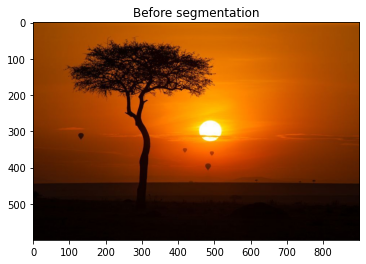

In [68]:
plt.imshow(im)
plt.title("Before segmentation")
plt.show()

**Passo 14**

Apresentar a imagem processada.

Podemos perceber que a imagem pode ser compreendida, e que as nuances de cores foram substituídas pela cor dominante encontrada no segmento.

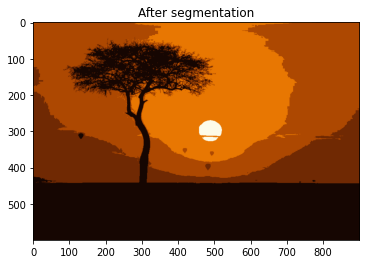

In [69]:
plt.imshow(new_pixel)
plt.title("After segmentation")
plt.show()